# CNN for Image Classification

In this lab, you are given a dataset containing 6,000 pictures of cats and dogs (3,000 cats, 3,000 dogs) and asked to train a classifier built upon Convolutional Neural Networks (ConvNets) to classify images as "dogs" or "cats".

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

import keras
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

from sklearn.preprocessing import LabelBinarizer

Using TensorFlow backend.


### Exercise 1 
Split the dataset by selecting 4,800 pictures for training, 600 for validation, and 600 for testing.

In [2]:
img_width = 50
img_height = 50
num_classes = 2
DATA_DIR = './data/' # path of the folder containing all the images
image_filenames = [DATA_DIR+i for i in os.listdir(DATA_DIR)] # use this for full dataset

# Split the data in three sets, 80% for training, 10% for validation and 10% for testing
# make sure that the image filenames have a fixed order before shuffling
# Add your code here


'''
###############################################################################################################

NOTE: Please note that some comments were added after running, so they do not appear on the results section.
Comments are all in the code section.


################################################################################################################
'''


image_filenames.sort() # make sure that the filenames have a fixed order before shuffling
np.random.seed(1234)  
np.random.shuffle(image_filenames) # shuffles the ordering of filenames (deterministic given the chosen seed)


'''
Selecting 80% training and the other 10% for testing
'''

split_1 = int(0.8 * len(image_filenames)) 
split_2 = int(0.9 * len(image_filenames))

''' ################ '''
''' Image Extraction '''
''' ################ '''

print("Loading Images")


'''
Grabbing the list of image in our dataset directory:
'''

data = []
labels = []

# loop over the image paths
for imagePath in image_filenames:
    # extract the class label from the filename
    if 'cat' in imagePath:
        label = 1
    else:
        label = 0
 
    # load the image and resize it to be a fixed 50x50 pixels,
    # ignoring aspect ratio
    image=cv2.imread(imagePath)
    image = cv2.resize(image, (img_width, img_height))
 
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
    
# convert the data into a NumPy array, then preprocess it by scaling
# all pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0


from keras.utils import to_categorical

trainX = np.array(data[:split_1])
trainY = to_categorical(labels[:split_1])
valX = np.array(data[split_1:split_2])
valY = to_categorical(labels[split_1:split_2])
testX = np.array(data[split_2:])
testY = to_categorical(labels[split_2:])

Loading Images


### Exercise 2
Train a Convolutional Neural Network (ConvNet) on the training set. The general structure of the ConvNet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. A Conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. A MaxPooling2D layer is used to downscale input in both the vertical and horizontal dimensions.

In [42]:
# Add your code here

''' 
======================
 Model Initialization
======================


For our very basic model we are training on CNN with 32 neurons with relu as our activation function, followed by a
MaxPoolin2D layer. Then, a Flatten layer is applied in ordert to convert the 3D feature map into a 1D feature vector.
Finally, our output layer is implemented with a sigmoid activation function, as this is a two calss classifier.
'''

model = Sequential()

# HIDDEN LAYERS

model.add(Conv2D(32, (3, 3), input_shape=(50, 50,3), activation='relu')) # Relu is the "best" activation function
                                                                        # as it is easier to train (gives values 0 or >=1)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# OUTPUT LAYER 

model.add(Dense(2))
model.add(Activation("softmax")) # As this is a two class classifier, sigmoid function is the best fit

# initialize the number of epochs and batch size
EPOCHS = 20
BS = 32
 
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=40, zoom_range=0.2,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

print("[INFO] compiling model...")

model.compile(loss='binary_crossentropy',
              optimizer= 'RMSprop',
              metrics=['accuracy'])

# train the network
print("[INFO] training model...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS), steps_per_epoch=len(trainX) // BS,
    validation_data=aug.flow(valX, valY, batch_size=BS), validation_steps= len(valX) // BS,
    epochs=EPOCHS, workers=9, shuffle=True)
#H = model.fit(trainX, trainY, batch_size=BS, validation_data=(valX, valY), epochs=EPOCHS)
model.save_weights('first_try.h5')

[INFO] compiling model...
[INFO] training model...
Epoch 1/20
150/150 [==============================] - 7s 48ms/step - loss: 0.7061 - acc: 0.5633 - val_loss: 0.6649 - val_acc: 0.6319
Epoch 2/20
150/150 [==============================] - 6s 38ms/step - loss: 0.6584 - acc: 0.6112 - val_loss: 0.6411 - val_acc: 0.6109
Epoch 3/20
150/150 [==============================] - 6s 37ms/step - loss: 0.6431 - acc: 0.6277 - val_loss: 0.6257 - val_acc: 0.6761
Epoch 4/20
150/150 [==============================] - 6s 37ms/step - loss: 0.6302 - acc: 0.6446 - val_loss: 0.5963 - val_acc: 0.6690
Epoch 5/20
150/150 [==============================] - 6s 37ms/step - loss: 0.6260 - acc: 0.6479 - val_loss: 0.6804 - val_acc: 0.5792
Epoch 6/20
150/150 [==============================] - 6s 37ms/step - loss: 0.6297 - acc: 0.6502 - val_loss: 0.6024 - val_acc: 0.6919
Epoch 7/20
150/150 [==============================] - 6s 37ms/step - loss: 0.6170 - acc: 0.6631 - val_loss: 0.6047 - val_acc: 0.6461
Epoch 8/20
150/150

### Exercise 3

Output the training/validation loss and accuracy curves. Also print the classification results (e.g., classification accuracy, confusion matrix, precision-recall curves and/or ROC curves) on the test set.

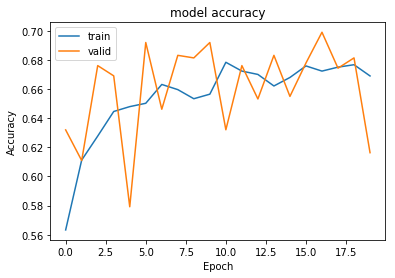

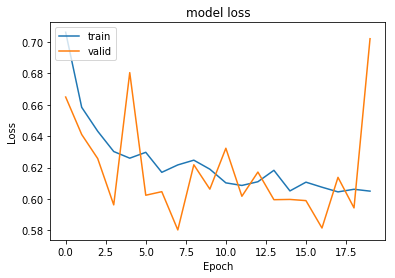

Accuracy on VALIDATION: 60.80097085869025


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.utils.fixes import signature

# Add your code here

'''
===========
EVALUATION
===========


According to the graphs below, one is able to notice that the validation loss is way below the training loss
and the training accuracy is way below the validation accuracy. This suggests that our model is underfitting.
'''

# summarize history for accuracy
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

acc = model.evaluate_generator(aug.flow(valX, valY, batch_size=BS),len(valX), workers=9)
#acc = model.evaluate(valX, valY)
print('Accuracy on VALIDATION: %s' % (acc[1]*100))

Classification Accuracy on TESTING Set:
61.12283666760874
Confusion Matrix:
[[139 164]
 [ 31 266]]
              precision    recall  f1-score   support

           0       0.82      0.46      0.59       303
           1       0.62      0.90      0.73       297

   micro avg       0.68      0.68      0.68       600
   macro avg       0.72      0.68      0.66       600
weighted avg       0.72      0.68      0.66       600



Text(0, 0.5, 'True positive rate')

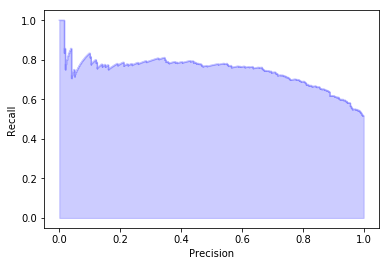

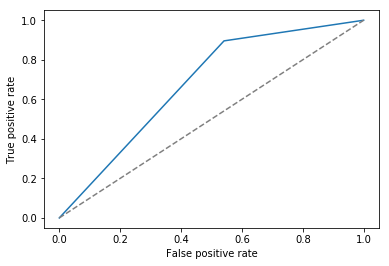

In [44]:

y_pred = to_categorical(model.predict_classes(testX))

score = model.evaluate_generator(aug.flow(testX, testY, batch_size=BS),len(testX), workers=12)
print('Classification Accuracy on TESTING Set:')
print(score[1]*100)

print("Confusion Matrix:")
print(confusion_matrix(testY.argmax(axis=1), y_pred.argmax(axis=1)))

print(classification_report(testY.argmax(axis=1), y_pred.argmax(axis=1)))

y_prob = [x[1] for x in model.predict_proba(testX)]
precision, recall, _ = precision_recall_curve(testY.argmax(axis=1),y_prob, pos_label=1)
    
step_kwargs = ({'step': 'post'}
    if 'step' in signature(plt.fill_between).parameters
    else {})



plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.figure()
fpr, tpr, thresholds = roc_curve(testY.argmax(axis=1), y_pred.argmax(axis=1))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

'''
The accuracy of the basic model is around 61% and, along with the confussion matrix, we realize that 
more errors were made by predicting cats (class 1) as dogs (class 0) than predicting dogs as cats.

As we know, Precision-Recall curves summarize the trade-off between the true positive rate (sensitivity) and the 
positive predictive value of our model; we want them both to be 1 (or as close as we can get). Therefore, the closer we
can get to (1,1) coordenate, the better. By the graphs shown below, one is able to notice that the previous description
of the most desirable scenario is no accomplished by our model. This is suggested due to the fact that for increasing 
the positive predictive value of our model (Recall) in a small ammount (from 0.6 to 0.8), represent a 0.2 precision 
trade-off (from 0.8 to 0.4).

ROC curve summarize the trade-off between the true positive rate and false positive rate of our model. In the curve
shown below, one is able to notice that the cost of increasing the true positive rate in one unit, represents an increas
of less than one of the flase positive rate. However, after a maximum of around 90% of the true positive rate is reached,
the trade off of gaining false positives gets higher.
'''



### Exercise 4

Explore different network architectures (e.g., stacking 4 Conv2D+MaxPooling2D layers) and various ways in tuning the model parameters to see if you can improve the model performance on the validation set.

In [35]:
# Add your code here


'''
===============
IMPROVED MODEL
===============

Now, for our improved model, we are using stacked CNN layers with different number of neurons and relu as our activation
function. Each CNN layer is followed by a BatchNormalization and a MaxPoolin2D layer. Then, Flatten is applied in order
to convert the 3D feature map into a 1D feature vector. Finally, our output layer is implemented with a sigmoid
activation function, as this is a two calss classifier. The accuracy on our validation set gets a small improvement.
'''

# fix random seed for reproducibility
np.random.seed(1234) 

# define the grid search parameters
BS = 32

EPOCHS = 18

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(50, 50,3), activation='relu'))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64,(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(2))
model1.add(Activation('softmax'))

 
aug = ImageDataGenerator(rotation_range=40, zoom_range=0.2,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, # Shift images vertically or horizontally 
    horizontal_flip=True, fill_mode="nearest") # Fill missing pixels with the color of the nearest pixel


print("Compiling Model")
model1.compile(loss='binary_crossentropy',
              optimizer= 'RMSprop',
              metrics=['accuracy'])

# train the network
print("Training Model")
H2 = model1.fit_generator(aug.flow(trainX, trainY, batch_size=BS), steps_per_epoch=len(trainX) // BS,
    validation_data=aug.flow(valX, valY, batch_size=BS), validation_steps= len(valX) // BS,
    epochs=EPOCHS, workers=9, shuffle=True)
#H2 = model1.fit(trainX, trainY, batch_size=BS, validation_data=(valX, valY), epochs=EPOCHS)
model1.save('my_model_1.h5')
model1.save_weights('second_try.h5')


score = model1.evaluate_generator(aug.flow(valX, valY, batch_size=BS),len(valX), workers=9)
#score = model1.evaluate(valX, valY)
print('Classification Accuracy on VALIDATION Set:')
print(score[1]*100)

Compiling Model
Training Model
Epoch 1/18
150/150 [==============================] - 30s 200ms/step - loss: 0.9405 - acc: 0.5238 - val_loss: 0.7914 - val_acc: 0.4722
Epoch 2/18
150/150 [==============================] - 28s 186ms/step - loss: 0.7187 - acc: 0.5440 - val_loss: 0.8455 - val_acc: 0.4824
Epoch 3/18
150/150 [==============================] - 28s 186ms/step - loss: 0.6961 - acc: 0.5585 - val_loss: 0.8295 - val_acc: 0.4806
Epoch 4/18
150/150 [==============================] - 28s 187ms/step - loss: 0.6727 - acc: 0.5950 - val_loss: 0.6511 - val_acc: 0.6197
Epoch 5/18
150/150 [==============================] - 28s 186ms/step - loss: 0.6649 - acc: 0.6019 - val_loss: 0.8550 - val_acc: 0.4877
Epoch 6/18
150/150 [==============================] - 28s 187ms/step - loss: 0.6512 - acc: 0.6302 - val_loss: 0.7281 - val_acc: 0.5317
Epoch 7/18
150/150 [==============================] - 28s 186ms/step - loss: 0.6475 - acc: 0.6360 - val_loss: 0.7843 - val_acc: 0.4665
Epoch 8/18
150/150 [====

### Exercise 5

Apply the trained model on the testing set and output the classification results.

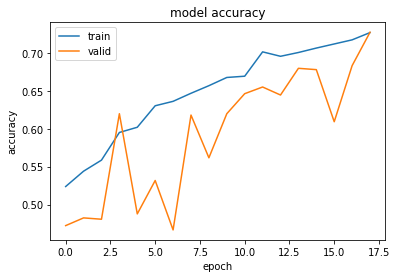

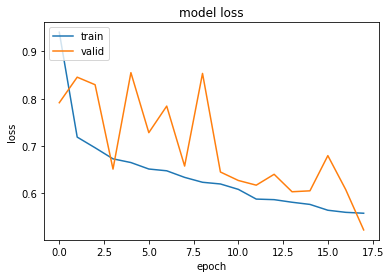

In [45]:
# Add your code here

'''
===========
EVALUATION
===========

By reviewing the accuracy of the training set is way higher than the validation set. Also, the loss of our training set
is considerably lower than the training set. The high difference in the performance on both train and validation datasets
reflects that our model is overfitting. The bad performance is consitently present gets higher on every training step 
of the model.
'''


# summarize history for accuracy
plt.plot(H2.history['acc'])
plt.plot(H2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


Classification Accuracy on TESTING Set:
70.48860279604975
Confusion Matrix:
[[253  50]
 [109 188]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       303
           1       0.79      0.63      0.70       297

   micro avg       0.73      0.73      0.73       600
   macro avg       0.74      0.73      0.73       600
weighted avg       0.74      0.73      0.73       600



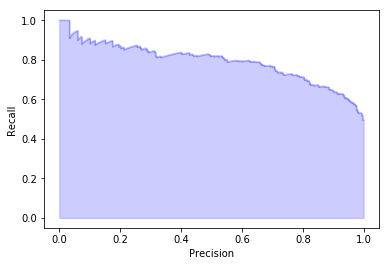

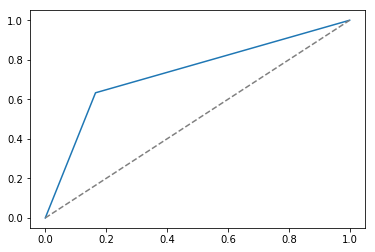

In [46]:
y_pred = to_categorical(model1.predict_classes(testX))

score = model1.evaluate_generator(aug.flow(testX, testY, batch_size=BS),len(testX), workers=12)
print('Classification Accuracy on TESTING Set:')
print(score[1]*100)

y_pred_flat = [item for sublist in y_pred for item in sublist]

print("Confusion Matrix:")
print(confusion_matrix(testY.argmax(axis=1), y_pred.argmax(axis=1)))

print(classification_report(testY.argmax(axis=1), y_pred.argmax(axis=1)))


y_prob = [x[1] for x in model1.predict_proba(testX)]
precision, recall, _ = precision_recall_curve(testY.argmax(axis=1),y_prob, pos_label=1)
    
step_kwargs = ({'step': 'post'}
    if 'step' in signature(plt.fill_between).parameters
    else {})



plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.figure()
fpr, tpr, thresholds = roc_curve(testY.argmax(axis=1), y_pred.argmax(axis=1))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], color='grey', linestyle='--')

'''
The accuracy of the imporved model increased to 70% on the testig set (around 9% grater than the previous model) and,
along with the confussion matrix, we realize that this time more errors were made by predicting cats (class 1) as dogs
(class 0) than predicting dogs as cats.

By the graphs shown below, one is able to notice that this model still presents a bid trade-off between the insrease
of the positive predictive value (Recall) and the loss of precision.

In the curve ROC curve shown below, one is able to notice that after reaching a close to 0.6 true positive rate,
the cost of increasing this measure in one unit represents an increase of more than twice the ammount of the flase
positive rate.
'''

### Exercise 6 

Plot the saliency map of original image to see which part is important for making classification decisions. You can refer to the following blog article on how to generate visualisation results of the filters in the ConvNets.
https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

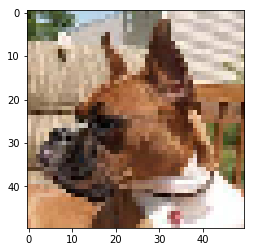

(1, 50, 50, 3)


In [47]:
from keras.preprocessing import image

imagePath = image_filenames[500]
img=image.load_img(imagePath, target_size=(50,50))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

'\nBy printing cevereal filters, one can see different patterns and figures that the layers are capturing. However,\nno real pattern was found\n'

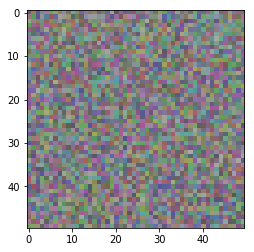

In [63]:

# Add your code here


'''
NOTE: 

This code is based on the references blog post

'''


layer_dict = dict([(layer.name, layer) for layer in model1.layers])


from keras import backend as K

input_img = model1.input


layer_name = 'conv2d_53'
filter_index = 30

layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

# we start from a gray image with some noise
input_img_data = np.random.random((1, img_width, img_height, 3)) * 20 + 128.
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * i
    
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
#     x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)
plt.imshow(img)

'''
By printing cevereal filters, one can see different shapes, colors and figures captured by each layer. However,
is hard to distinguish a pattern which let us recognize a specific point in which cat or dog are differenciated.
'''
